<a href="https://colab.research.google.com/github/GlezRuben/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression



    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data


In [12]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(path, index_col=False, header=0)


## Understanding the Data

### `Tetuan City power consumption.csv`:

We have downloaded the Power consumption of Tetouan city Data Set, **`Tetuan City power consumption.csv`**, which is is related to power consumption of three different distribution networks of Tetouan city which is located in north Morocco. [Dataset source](https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city)

*   **Date Time:** Each ten minutes.
*   **Temperature:** Weather Temperature of Tetouan city.
*   **Humidity:** Weather Humidity of Tetouan city.
*   **Wind Speed of Tetouan city.**
*   **general diffuse flows**
*   **diffuse flows**
*   **power consumption of zone 1 of Tetouan city.**
*   **power consumption of zone 2 of Tetouan city.**
*   **power consumption of zone 3 of Tetouan city.**


In [13]:
# take a look at the dataset
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Data Exploration

Let's first have a descriptive exploration on our data.

In [14]:
# summarize the data
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Let's select some features to explore more.

---

In [15]:
cdf = df[['Temperature','Humidity','Wind Speed','Zone 1 Power Consumption']]
cdf.rename(columns={"Wind Speed": "Wind_Speed", "Zone 1 Power Consumption": "Zone_1_Power_Consumption"}, inplace=True)
cdf.head(9)

<ipython-input-15-6ce5785b4a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.rename(columns={"Wind Speed": "Wind_Speed", "Zone 1 Power Consumption": "Zone_1_Power_Consumption"}, inplace=True)


,Temperature,Humidity,Wind_Speed,Zone_1_Power_Consumption
0,6.559,73.8,0.083,34055.69620
1,6.414,74.5,0.083,29814.68354
2,6.313,74.5,0.080,29128.10127
3,6.121,75.0,0.083,28228.86076
4,5.921,75.7,0.081,27335.69620
5,5.853,76.9,0.081,26624.81013
6,5.641,77.7,0.080,25998.98734
7,5.496,78.2,0.085,25446.07595
8,5.678,78.1,0.081,24777.72152


We can plot each of these features:

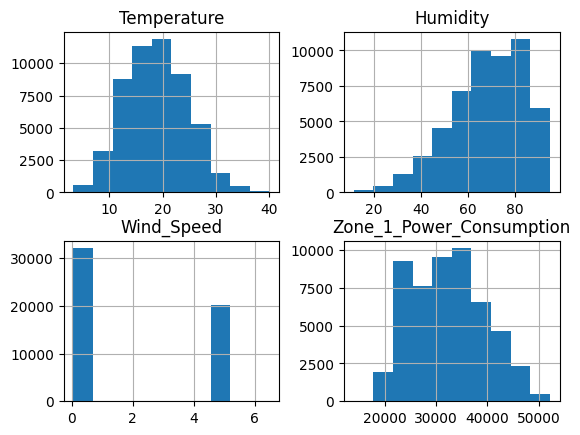

In [16]:
viz = cdf[['Temperature','Humidity','Wind_Speed','Zone_1_Power_Consumption']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Zone 1 Power Consumption, to see how linear their relationship is:


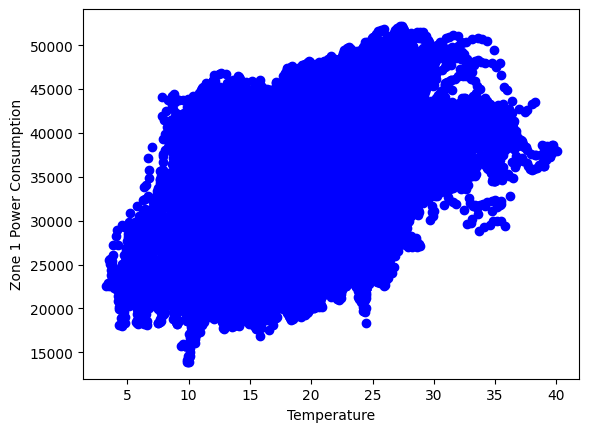

In [17]:
plt.scatter(cdf.Temperature, cdf.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

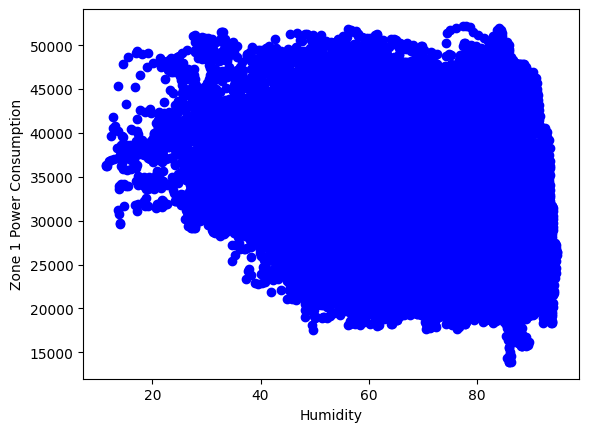

In [18]:
plt.scatter(cdf.Humidity, cdf.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Humidity")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 


In [20]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


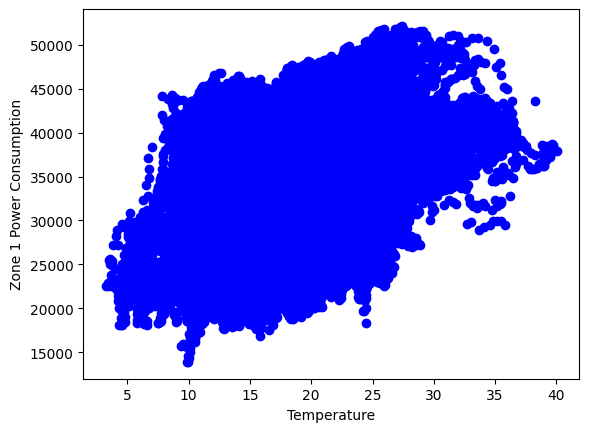

In [21]:
plt.scatter(train.Temperature, train.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the Zone 1 Power Consumption. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting "Zone 1 Power Consumption" using the features "Temperature", "Humidity" and "Wind Speed". The good thing here is that multiple linear regression model is the extension of the simple linear regression model.


In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Temperature','Humidity','Wind_Speed']])
y = np.asanyarray(train[['Zone_1_Power_Consumption']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 505.96691383  -48.60155816 -129.69575784]]


As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>


In [23]:
y_hat= regr.predict(test[['Temperature','Humidity','Wind_Speed']])
x = np.asanyarray(test[['Temperature','Humidity','Wind_Speed']])
y = np.asanyarray(test[['Zone_1_Power_Consumption']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 39741664.57
Variance score: 0.20


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.
